In [1]:
import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


## Load Dataset

In [2]:
# JAKARTA
mobility = pd.read_csv('data/jakarta/mobility_maret_january.csv')
weather = pd.read_csv('data/jakarta/weather_maret_january.csv')
case = pd.read_csv('data/jakarta/case_maret_january.csv')

In [3]:
# YOGYAKARTA
#mobility = pd.read_csv('data/yogyakarta/mobility_jogja.csv')
#weather = pd.read_csv('data/yogyakarta/weather_jogja.csv')
#case = pd.read_csv('data/yogyakarta/case_jogja.csv')

## Deskripsi Data Mobility

In [4]:
print(mobility.shape)
mobility.head()

(306, 7)


,date,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
0,2020-03-18,-22,-3,-28,-32,-19,11
1,2020-03-19,-28,-12,-33,-38,-21,12
2,2020-03-20,-30,-11,-32,-42,-23,15
3,2020-03-21,-35,-5,-38,-40,-10,11
4,2020-03-22,-49,-22,-59,-49,-12,14


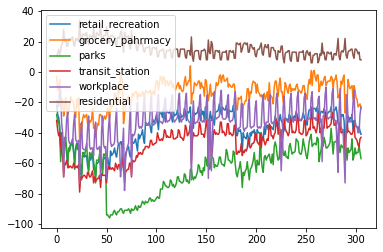

In [5]:
mobility.plot()
plt.show()

## Deskripsi Data Weather

In [6]:
print(weather.shape)
weather.head()

(306, 5)


,date,rh,avt,mxt,mnt
0,2020-03-18,86.0,27.6,29.0,25.8
1,2020-03-19,83.0,28.1,31.4,25.8
2,2020-03-20,82.0,27.4,31.2,25.2
3,2020-03-21,81.0,28.1,32.4,NaN
4,2020-03-22,84.0,27.2,31.2,25.0


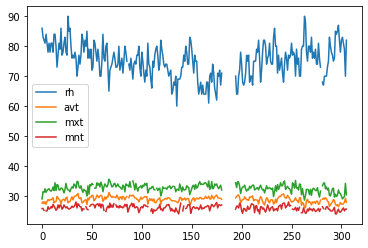

In [7]:
weather.plot()
plt.show()

## Deskripsi Data Case

In [8]:
print(case.shape)
case.head()

(306, 2)


,date,case
0,2020-03-18,158
1,2020-03-19,210
2,2020-03-20,215
3,2020-03-21,267
4,2020-03-22,307


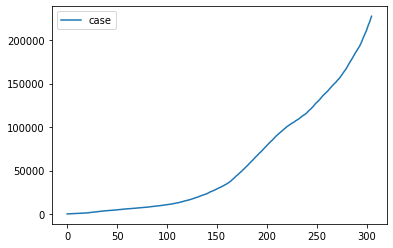

In [9]:
case.plot()
plt.show()

## Interpolasi & Preprocessing data weather

In [10]:
new_weather = weather.interpolate(method='spline', order=2)

In [11]:
new_weather.head()

,date,rh,avt,mxt,mnt
0,2020-03-18,86.0,27.6,29.0,25.800000
1,2020-03-19,83.0,28.1,31.4,25.800000
2,2020-03-20,82.0,27.4,31.2,25.200000
3,2020-03-21,81.0,28.1,32.4,26.132857
4,2020-03-22,84.0,27.2,31.2,25.000000


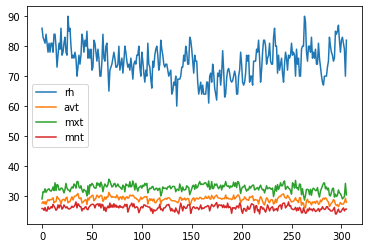

In [12]:
new_weather.plot()
plt.show()
#print(new_weather)

## Gabungkan data menjadi 1 data multivariative

In [13]:
case.date = pd.to_datetime(case.date)

date = case['date'].values

case.set_index('date', inplace=True)

new_weather.date = pd.to_datetime(new_weather.date)
new_weather.set_index('date', inplace=True)

mobility.date = pd.to_datetime(mobility.date)
mobility.set_index('date', inplace=True)

In [14]:
mobility.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-18,-22,-3,-28,-32,-19,11
2020-03-19,-28,-12,-33,-38,-21,12
2020-03-20,-30,-11,-32,-42,-23,15
2020-03-21,-35,-5,-38,-40,-10,11
2020-03-22,-49,-22,-59,-49,-12,14


In [15]:
df = pd.merge(case, new_weather, left_index=True, right_index=True)
df = pd.merge(df, mobility, left_index=True, right_index=True)


In [16]:
df.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-18,158,86.0,27.6,29.0,25.800000,-22,-3,-28,-32,-19,11
2020-03-19,210,83.0,28.1,31.4,25.800000,-28,-12,-33,-38,-21,12
2020-03-20,215,82.0,27.4,31.2,25.200000,-30,-11,-32,-42,-23,15
2020-03-21,267,81.0,28.1,32.4,26.132857,-35,-5,-38,-40,-10,11
2020-03-22,307,84.0,27.2,31.2,25.000000,-49,-22,-59,-49,-12,14


## Pearson Corellation

In [17]:
case = df['case']
for column in df:
    dtt = df[column]
    print(column, 'data: mean=%.3f stdv=%.3f' % (mean(dtt), std(dtt)))
    corr, _ = pearsonr(case, dtt)
    print('Pearsons correlation: %.3f' % corr)

case data: mean=60431.503 stdv=63063.228
Pearsons correlation: 1.000
rh data: mean=75.024 stdv=5.534
Pearsons correlation: 0.096
avt data: mean=28.841 stdv=0.902
Pearsons correlation: -0.391
mxt data: mean=32.669 stdv=1.233
Pearsons correlation: -0.330
mnt data: mean=26.033 stdv=0.835
Pearsons correlation: -0.327
retail_recreation data: mean=-37.487 stdv=11.629
Pearsons correlation: 0.426
grocery_pahrmacy data: mean=-14.154 stdv=8.741
Pearsons correlation: 0.318
parks data: mean=-62.585 stdv=15.166
Pearsons correlation: 0.555
transit_station data: mean=-47.405 stdv=11.704
Pearsons correlation: 0.565
workplace data: mean=-33.650 stdv=12.824
Pearsons correlation: 0.230
residential data: mean=15.438 stdv=5.194
Pearsons correlation: -0.482


## Lag Plot

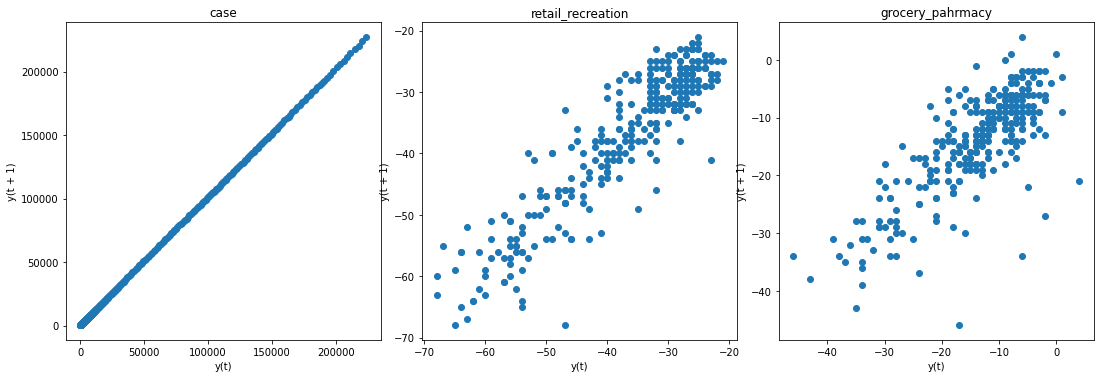

In [18]:
f2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['case'], ax=ax1)
ax1.set_title('case');

lag_plot(df['retail_recreation'], ax=ax2)
ax2.set_title('retail_recreation');

lag_plot(df['grocery_pahrmacy'], ax=ax3)
ax3.set_title('grocery_pahrmacy');

plt.show()

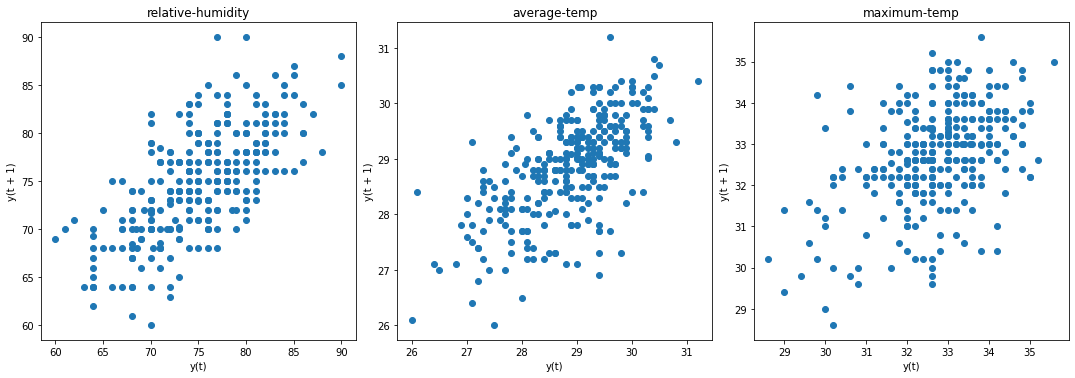

In [19]:
f2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['rh'], ax=ax4)
ax4.set_title('relative-humidity');

lag_plot(df['avt'], ax=ax5)
ax5.set_title('average-temp');

lag_plot(df['mxt'], ax=ax6)
ax6.set_title('maximum-temp');

plt.show()

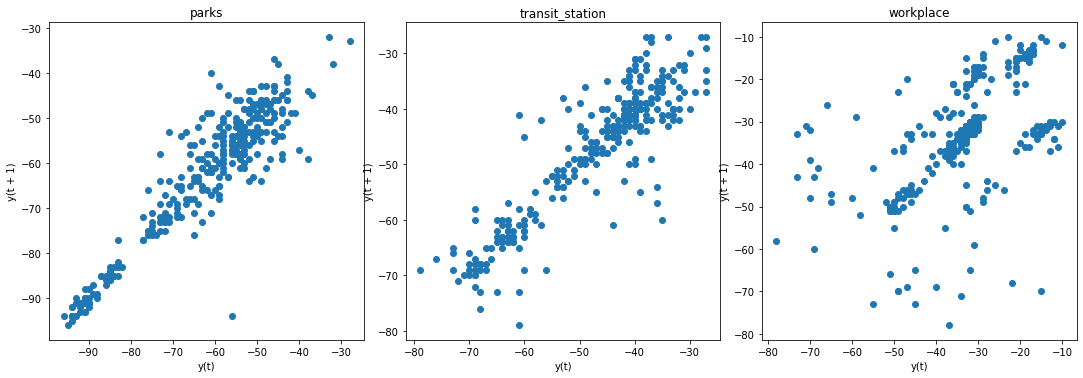

In [20]:
f2, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['parks'], ax=ax7)
ax7.set_title('parks');

lag_plot(df['transit_station'], ax=ax8)
ax8.set_title('transit_station');

lag_plot(df['workplace'], ax=ax9)
ax9.set_title('workplace');

plt.show()

## Plot Auto Correlation

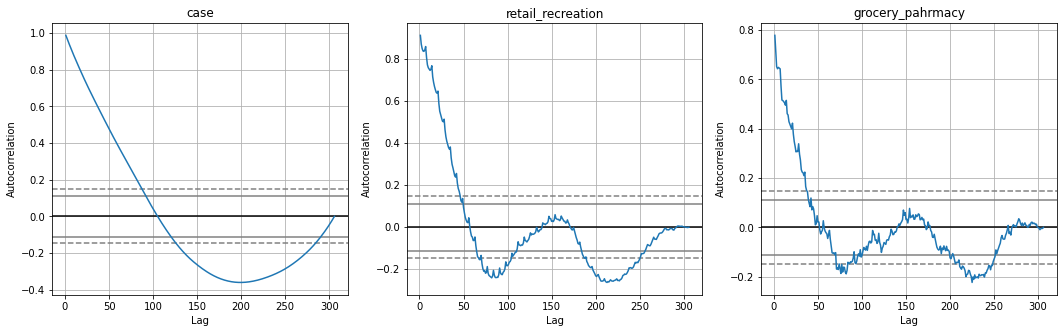

In [21]:
f3, (ax10, ax11, ax12) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(df['case'], ax=ax10)
ax10.set_title('case');

autocorrelation_plot(df['retail_recreation'], ax=ax11)
ax11.set_title('retail_recreation');

autocorrelation_plot(df['grocery_pahrmacy'], ax=ax12)
ax12.set_title('grocery_pahrmacy');

plt.show()

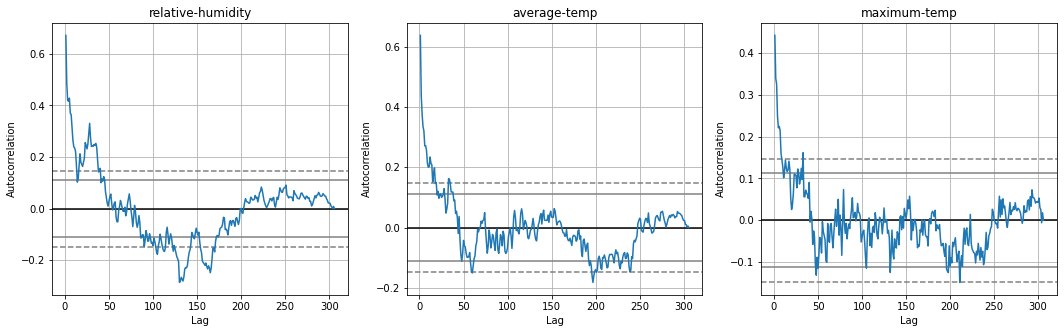

In [22]:
f3, (ax13, ax14, ax15) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(df['rh'], ax=ax13)
ax13.set_title('relative-humidity');

autocorrelation_plot(df['avt'], ax=ax14)
ax14.set_title('average-temp');

autocorrelation_plot(df['mxt'], ax=ax15)
ax15.set_title('maximum-temp');

plt.show()

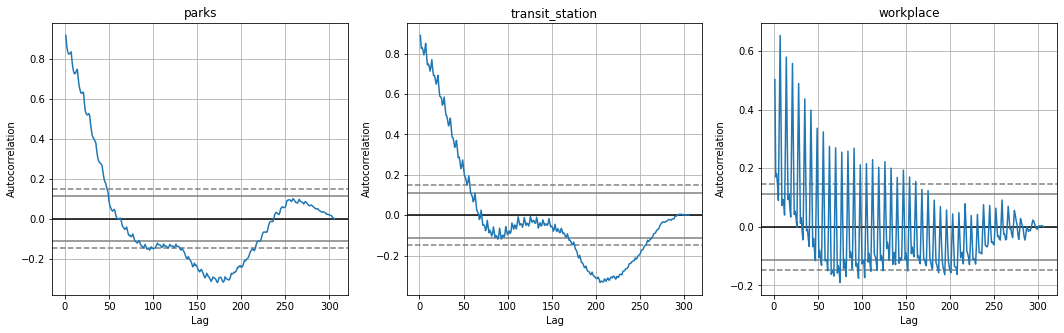

In [23]:
f3, (ax16, ax17, ax18) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(df['parks'], ax=ax16)
ax16.set_title('parks');

autocorrelation_plot(df['transit_station'], ax=ax17)
ax17.set_title('transit_station');

autocorrelation_plot(df['workplace'], ax=ax18)
ax18.set_title('workplace');

plt.show()

In [24]:
for column in df:
    X = df[column]
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('Hasil mean, variance pada', column, 'adalah :')
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%.2f, variance2=%.2f' % (var1, var2))

Hasil mean, variance pada case adalah :
mean1=9601.084967, mean2=111261.921569
variance1=60782559.92, variance2=2744028196.49
Hasil mean, variance pada rh adalah :
mean1=75.993256, mean2=74.054272
variance1=24.81, variance2=34.95
Hasil mean, variance pada avt adalah :
mean1=28.988873, mean2=28.692738
variance1=0.66, variance2=0.94
Hasil mean, variance pada mxt adalah :
mean1=32.773202, mean2=32.563861
variance1=1.15, variance2=1.89
Hasil mean, variance pada mnt adalah :
mean1=26.177713, mean2=25.889169
variance1=0.63, variance2=0.74
Hasil mean, variance pada retail_recreation adalah :
mean1=-42.705882, mean2=-32.267974
variance1=174.97, variance2=42.45
Hasil mean, variance pada grocery_pahrmacy adalah :
mean1=-17.084967, mean2=-11.222222
variance1=100.83, variance2=35.70
Hasil mean, variance pada parks adalah :
mean1=-71.084967, mean2=-54.084967
variance1=266.16, variance2=51.42
Hasil mean, variance pada transit_station adalah :
mean1=-54.150327, mean2=-40.660131
variance1=140.23, vari

## Split Data Train & Data Test

In [25]:

train_date = date[:int(len(df)*0.8)]
train_df = df[:int(len(df)*0.8)].copy()

test_date = date[int(len(df)*0.8):]
test_df = df[int(len(df)*0.8):].copy()

print(train_df.shape, test_df.shape)

(244, 11) (62, 11)


In [26]:
nobs = 62
train, test = df[0:-nobs], df[-nobs:]

# Check size
print(train.shape)  # (119, 8)
print(test.shape)  # (4, 8)

(244, 11)
(62, 11)


In [27]:
# Fungsi untuk ploting

def plot_sensor(name):
    
    plt.figure(figsize=(16,4))

    plt.plot(train_date, train_df[name], label='train')
    plt.plot(test_date, test_df[name], label='test')
    plt.ylabel(name); plt.legend()
    plt.show()
    
def plot_autocor(name, df):
    
    plt.figure(figsize=(16,4))
    
    timeLags = np.arange(1,100*24)
    plt.plot([df[name].autocorr(dt) for dt in timeLags])
    plt.title(name); plt.ylabel('autocorr'); plt.xlabel('time lags')
    plt.show()

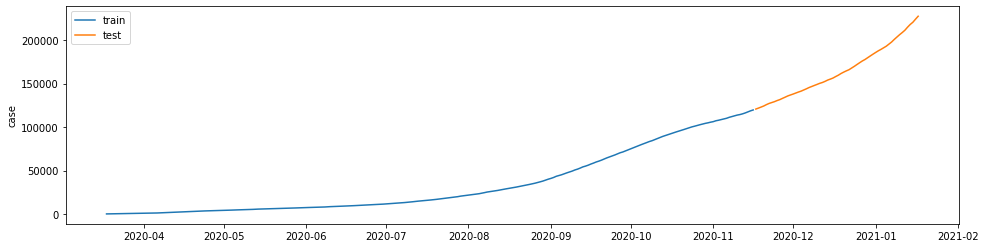

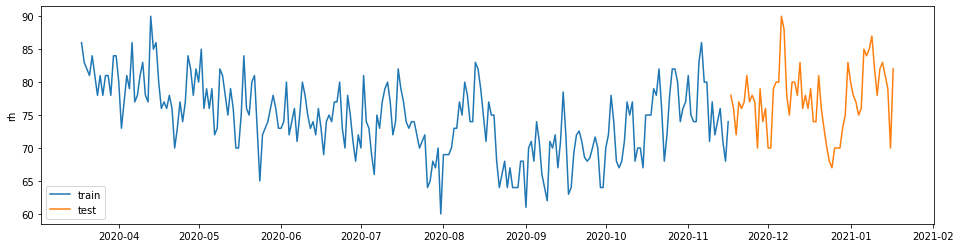

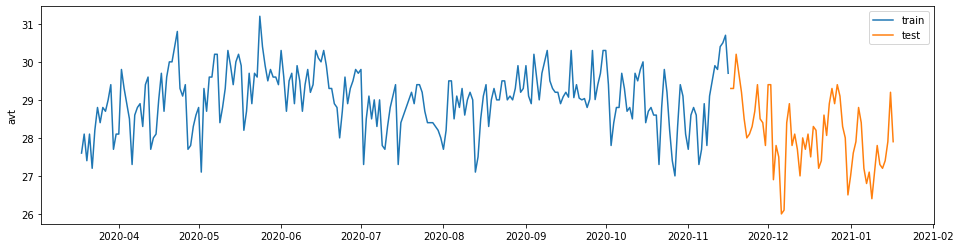

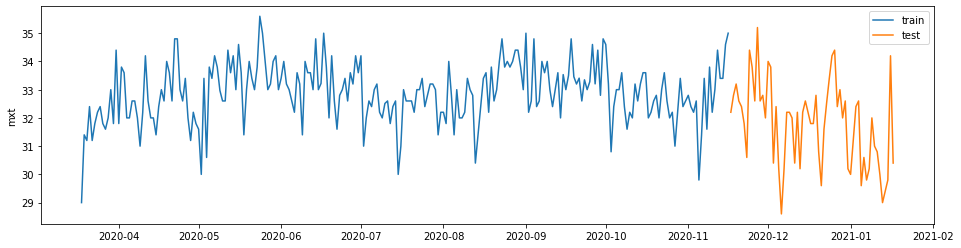

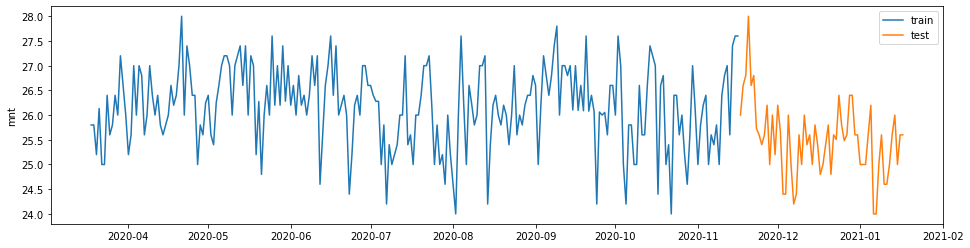

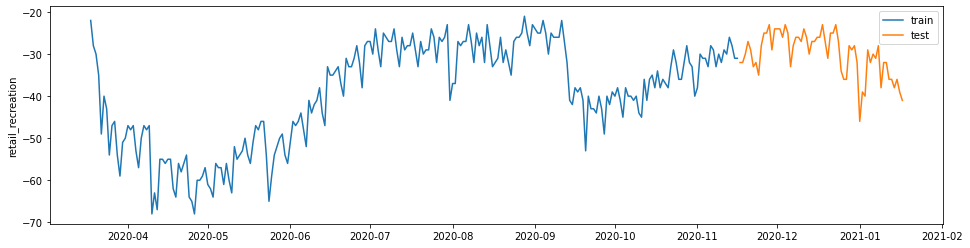

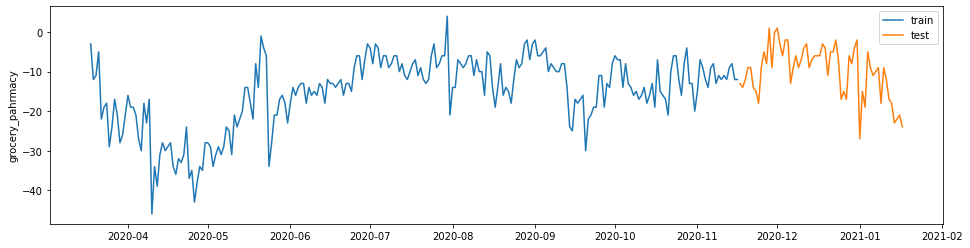

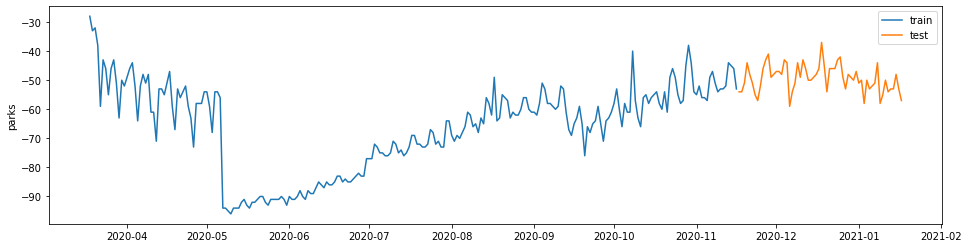

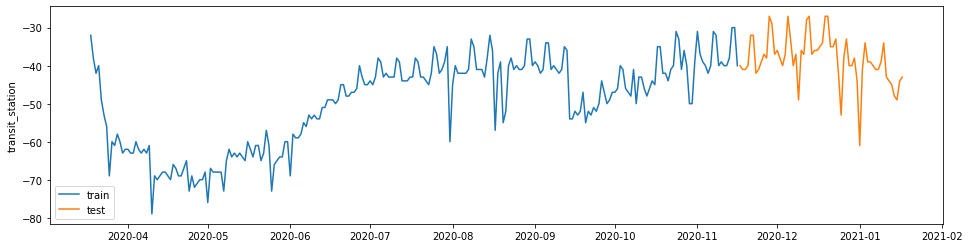

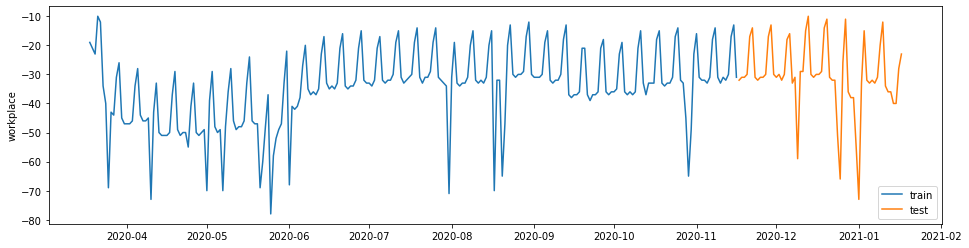

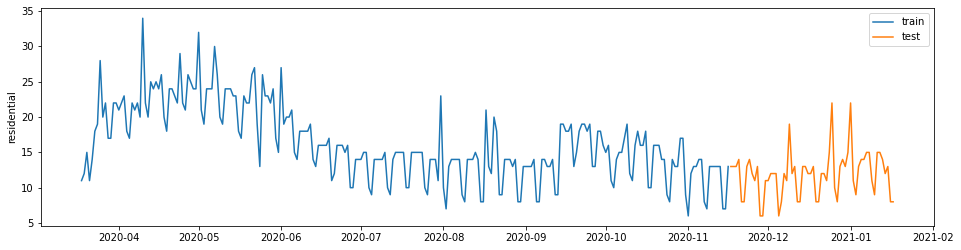

In [28]:
# PLot data train & test

for col in df.columns:
    plot_sensor(col)

In [29]:
print(test)

              case    rh   avt   mxt   mnt  retail_recreation  \
date                                                            
2020-11-17  120670  78.0  29.3  32.2  26.0                -32   
2020-11-18  121818  76.0  29.3  32.8  26.6                -32   
2020-11-19  123003  72.0  30.2  33.2  26.8                -30   
2020-11-20  124243  77.0  29.7  32.6  28.0                -27   
2020-11-21  125822  76.0  29.2  32.4  26.6                -29   
...            ...   ...   ...   ...   ...                ...   
2021-01-13  214728  83.0  27.2  29.0  25.6                -36   
2021-01-14  217893  81.0  27.4  29.4  26.0                -38   
2021-01-15  220434  79.0  27.9  29.8  25.0                -36   
2021-01-16  223970  70.0  29.2  34.2  25.6                -39   
2021-01-17  227365  82.0  27.9  30.4  25.6                -41   

            grocery_pahrmacy  parks  transit_station  workplace  residential  
date                                                                       

In [30]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
case   ::  391.41    > 263.2603  =>   True
rh     ::  289.21    > 219.4051  =>   True
avt    ::  211.41    > 179.5199  =>   True
mxt    ::  144.92    > 143.6691  =>   True
mnt    ::  105.19    > 111.7797  =>   False
retail_recreation ::  68.95     > 83.9383   =>   False
grocery_pahrmacy ::  37.77     > 60.0627   =>   False
parks  ::  21.62     > 40.1749   =>   False
transit_station ::  10.53     > 24.2761   =>   False
workplace ::  2.2       > 12.3212   =>   False
residential ::  0.65      > 4.1296    =>   False


In [31]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [32]:
# ADF test untuk setiap column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0729
 No. Lags Chosen       = 5
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.9642. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rh" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4096
 No. Lags Chosen       = 4
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0106. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "avt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signi

In [33]:
# Difference pertama untuk stationary
df_differenced = train.diff().dropna()

In [34]:
# ADF test pada difference pertama
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.3646
 No. Lags Chosen       = 4
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.9158. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rh" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.8717
 No. Lags Chosen       = 5
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "avt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [35]:
# Difference kedua untuk stationary
df_differenced = df_differenced.diff().dropna()

In [36]:
# ADF test pada difference kedua
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.3356
 No. Lags Chosen       = 3
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "rh" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.5769
 No. Lags Chosen       = 11
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "avt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

In [47]:
df_differenced.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-20,-47.0,2.0,-1.2,-2.6,-0.600000,4.0,10.0,6.0,2.0,0.0,2.0
2020-03-21,47.0,0.0,1.4,1.4,1.532857,-3.0,5.0,-7.0,6.0,15.0,-7.0
2020-03-22,-12.0,4.0,-1.6,-2.4,-2.065715,-9.0,-23.0,-15.0,-11.0,-15.0,7.0
2020-03-23,6.0,-6.0,1.9,1.8,1.132857,23.0,20.0,37.0,5.0,-20.0,1.0
2020-03-24,25.0,0.0,-0.4,-0.2,1.400000,-12.0,-2.0,-19.0,1.0,16.0,-3.0


In [38]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  31.13609995172202
BIC :  33.0447854090696
FPE :  33314258484240.168
HQIC:  31.90507397128489 

Lag Order = 2
AIC :  29.020172153642392
BIC :  32.68934568533207
FPE :  4037562504383.7437
HQIC:  30.498581208322648 

Lag Order = 3
AIC :  27.7285273863559
BIC :  33.168683739587635
FPE :  1126233786653.5752
HQIC:  29.9207606392441 

Lag Order = 4
AIC :  26.59020676007482
BIC :  33.81194618640835
FPE :  371519314618.5073
HQIC:  29.50069712928272 

Lag Order = 5
AIC :  25.913928017481886
BIC :  34.92795775140274
FPE :  198498451583.95523
HQIC:  29.54715277029357 

Lag Order = 6
AIC :  24.252113577919502
BIC :  35.069249341918976
FPE :  40660618742.473434
HQIC:  28.61259493505409 

Lag Order = 7
AIC :  24.123673458907454
BIC :  36.754840995655066
FPE :  39957292630.55114
HQIC:  29.21597920909762 

Lag Order = 8
AIC :  23.868899070377324
BIC :  38.32513570257899
FPE :  36169501174.59422
HQIC:  29.697643195472736 

Lag Order = 9
AIC :  24.01512323772298
BIC :  40.30757945627

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [39]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,35.80,35.96,3.524e+15,35.86
1,31.03,33.00,2.983e+13,31.82
2,28.98,32.76*,3.877e+12,30.50
3,27.77,33.36,1.176e+12,30.02
4,26.63,34.03,3.906e+11,29.62
5,25.95,35.16,2.085e+11,29.67
6,24.29,35.31,4.292e+10,28.74*
7,24.17,37.00,4.280e+10,29.35
8,23.94,38.57,3.964e+10*,29.84
9,23.97,40.41,5.070e+10,30.60


In [40]:
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Mar, 2021
Time:                     15:06:05
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    45.2610
Nobs:                     230.000    HQIC:                   32.2134
Log likelihood:          -4816.97    FPE:                8.67808e+10
AIC:                      23.3918    Det(Omega_mle):     5.73399e+08
--------------------------------------------------------------------
Results for equation case
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         5.221205         7.035925            0.742           0.458
L1.case                      -0.562744         0.106391           -5.289           0.000
L1.rh                        

In [41]:
# Ambil lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data untuk forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

12


array([[ 2.90e+01,  9.00e+00, -1.10e+00, -3.20e+00, -1.60e+00, -2.00e+00,
         1.00e+00, -1.00e+00, -1.00e+00, -1.00e+00,  1.00e+00],
       [-1.25e+02, -6.00e+00,  1.70e+00,  4.40e+00,  2.00e+00,  7.00e+00,
         7.00e+00,  9.00e+00,  4.00e+00,  3.00e+00, -1.00e+00],
       [ 4.46e+02, -9.00e+00,  8.00e-01,  4.00e-01, -8.00e-01, -6.00e+00,
        -4.00e+00, -6.00e+00,  7.00e+00,  1.10e+01, -6.00e+00],
       [-2.92e+02,  6.00e+00, -2.30e+00, -3.80e+00,  6.00e-01, -3.00e+00,
        -6.00e+00, -6.00e+00, -1.00e+01, -9.00e+00,  5.00e+00],
       [-1.10e+02, -9.00e+00,  2.40e+00,  4.00e+00, -1.20e+00,  7.00e+00,
         7.00e+00,  1.00e+00, -7.00e+00, -2.10e+01,  7.00e+00],
       [ 2.97e+02,  1.50e+01, -9.00e-01, -3.80e+00,  2.20e+00, -5.00e+00,
        -3.00e+00,  4.00e+00,  9.00e+00,  1.50e+01, -6.00e+00],
       [-4.26e+02, -1.10e+01,  0.00e+00,  2.40e+00, -1.00e+00,  5.00e+00,
         2.00e+00, -1.00e+00, -2.00e+00,  4.00e+00,  0.00e+00],
       [ 2.44e+02,  7.00e+00, -5.0

In [42]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,case_2d,rh_2d,avt_2d,mxt_2d,mnt_2d,retail_recreation_2d,grocery_pahrmacy_2d,parks_2d,transit_station_2d,workplace_2d,residential_2d
date,,,,,,,,,,,
2020-11-17,45.753662,3.434990,-0.462592,-2.472562,-2.362595,-1.379038,1.374016,-3.717690,15.683395,33.801550,-8.008882
2020-11-18,250.589806,-11.877556,2.482749,1.002604,2.319451,7.816617,6.076324,20.316194,-7.585460,-24.918411,2.318634
2020-11-19,-249.336020,-7.649079,0.281163,4.199075,1.356480,-5.105109,-9.993699,6.045807,4.726022,11.700042,-2.791043
2020-11-20,84.350415,7.492256,-0.776523,-1.876023,-0.826698,-2.697832,-0.201011,-9.298699,-10.701187,-21.834584,6.952487
2020-11-21,63.692030,5.420594,-0.837735,-4.288131,-1.069406,-1.503139,4.418946,-14.732918,15.362625,31.691742,-8.030739
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,-38.145028,-0.734493,-0.223041,0.095485,0.322040,5.240292,0.432301,1.091873,-4.946624,-13.578196,4.577112
2021-01-14,41.985355,-0.378903,0.312434,-0.091110,-0.013422,-1.235901,2.544455,1.216146,2.607083,1.166722,-1.197933
2021-01-15,2.455182,0.365452,-0.003185,0.015751,-0.026644,0.768017,-1.346292,0.818523,-1.617608,1.726639,1.295469


In [43]:
def invert_transformation(train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (train[col].iloc[-1]-train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [44]:
df_results = invert_transformation(train, df_forecast, second_diff=True)

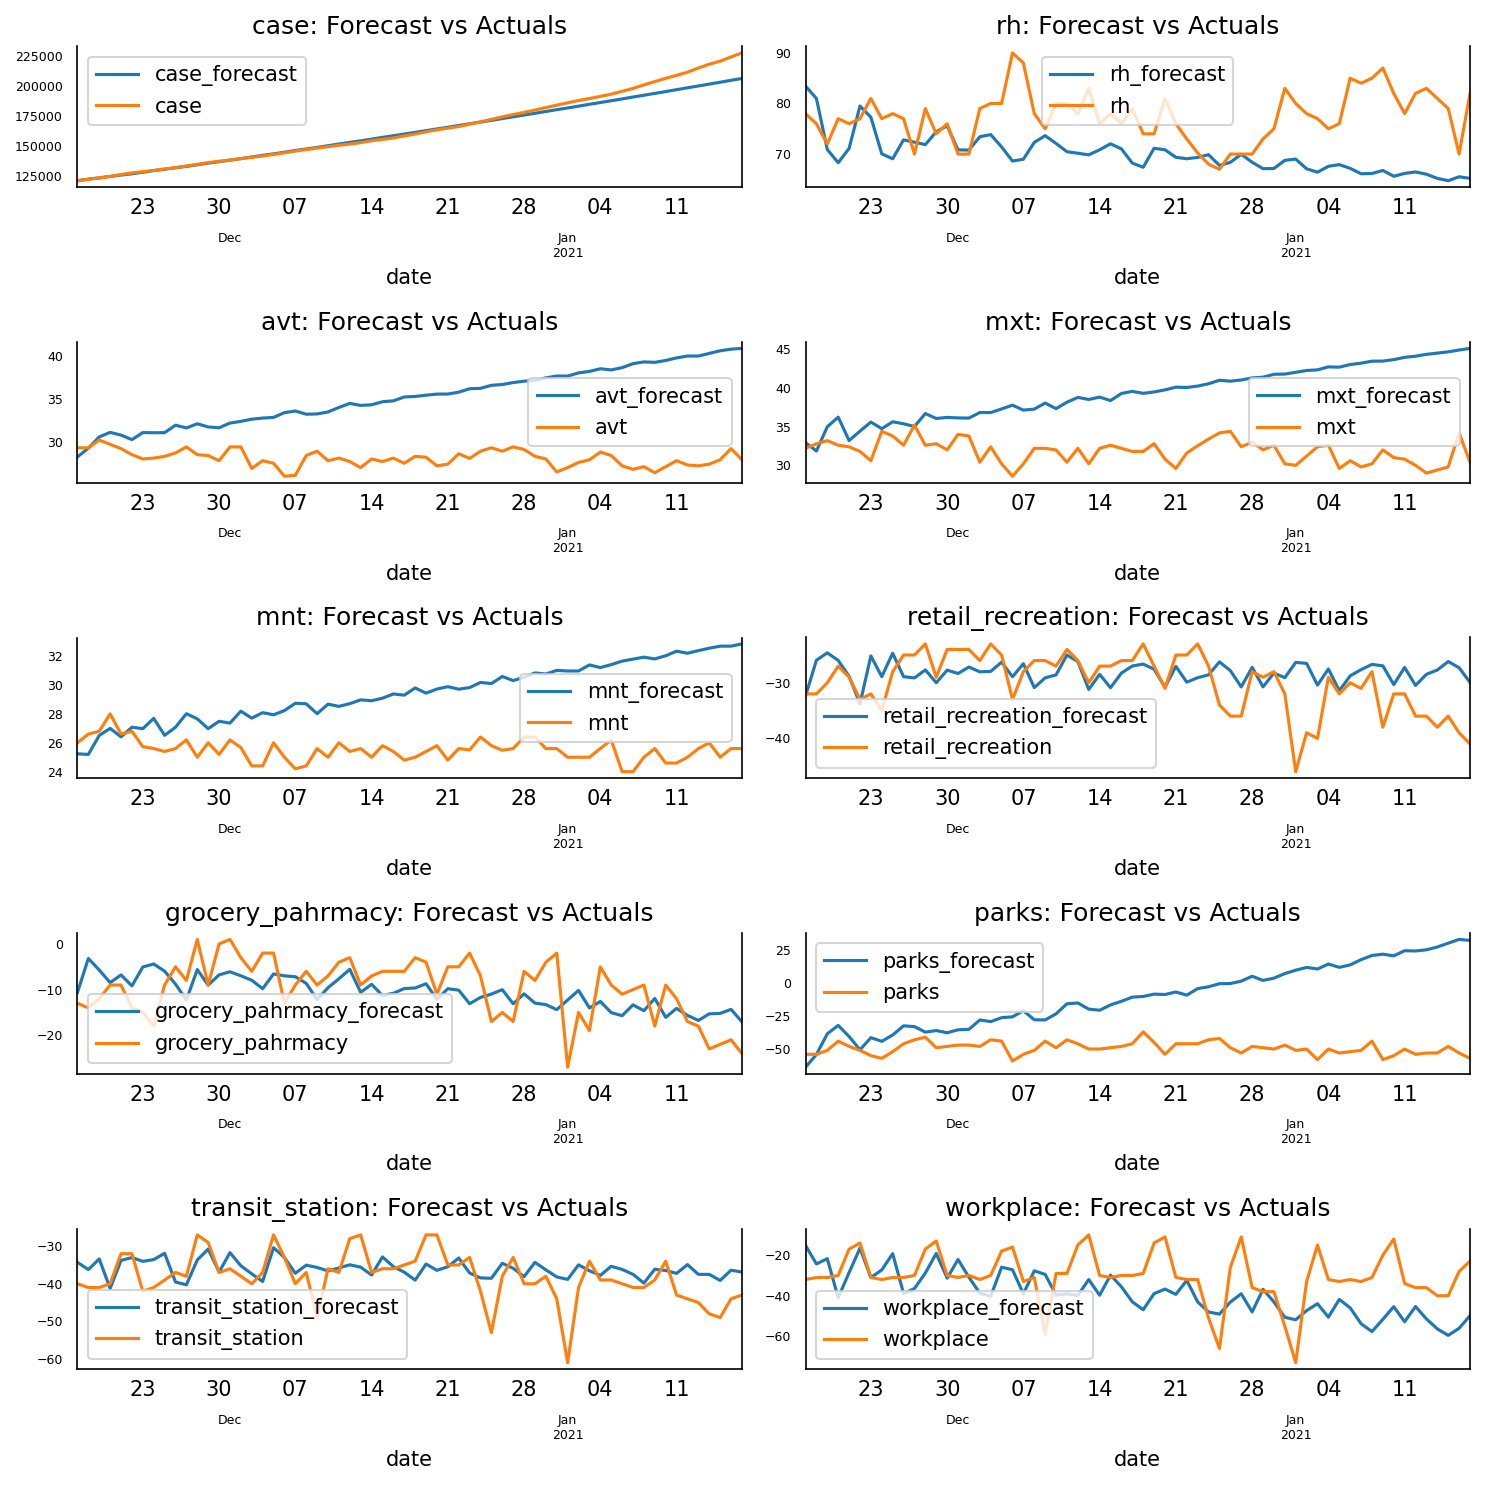

In [45]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [46]:
df_forecast.to_csv('hasil.csv')